In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
df = pd.read_csv('glassdoor_jobs.csv')

In [145]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [146]:
df.shape

(956, 15)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
Unnamed: 0           956 non-null int64
Job Title            956 non-null object
Salary Estimate      956 non-null object
Job Description      956 non-null object
Rating               956 non-null float64
Company Name         956 non-null object
Location             956 non-null object
Headquarters         956 non-null object
Size                 956 non-null object
Founded              956 non-null int64
Type of ownership    956 non-null object
Industry             956 non-null object
Sector               956 non-null object
Revenue              956 non-null object
Competitors          956 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 112.1+ KB


In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


In [149]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

### Exploratory Data Analysis and Data Cleaning

In [150]:
## Removing the unwanted column from the dataset
df.drop('Unnamed: 0', axis=1, inplace=True)

Text(0.5, 1.0, 'Before Handling -1 values')

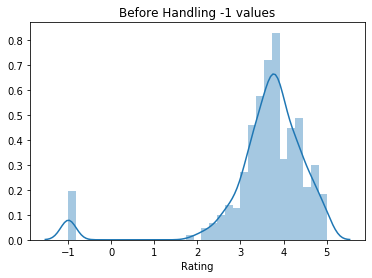

In [151]:
## Visualing the Rating column
sns.distplot(df['Rating'])
plt.title('Before Handling -1 values')

In [152]:
## Since the Rating feature follows the Gaussian/Normal Distribution, we will replace -1 with mean of the distribution
df['Rating'] = df['Rating'].apply(lambda x:np.NaN if x == -1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [153]:
df['Rating'].mean()

3.7709327548806906

Text(0.5, 1.0, 'After handling -1 value')

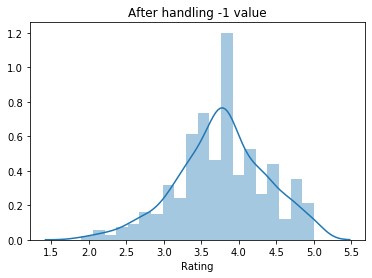

In [154]:
sns.distplot(df['Rating'])
plt.title('After handling -1 value')

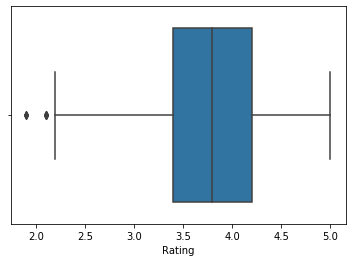

In [155]:
## Detecing the outliers in rating
sns.boxplot(df['Rating'])

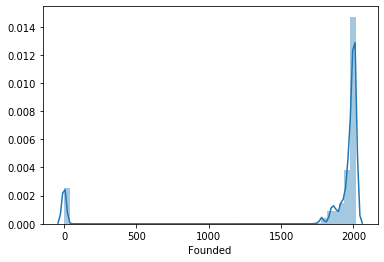

In [156]:
sns.distplot(df['Founded'])

**Note: Since Founded feature does not follow the normal distribution, but it is right skewed**.

We will replace -1 with the median of the distribution.

In [157]:
# Handling -1 values in the Founded column
df['Founded'] = df['Founded'].apply(lambda x:np.NaN if x == -1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

Text(0.5, 1.0, 'After Handling -1 Value')

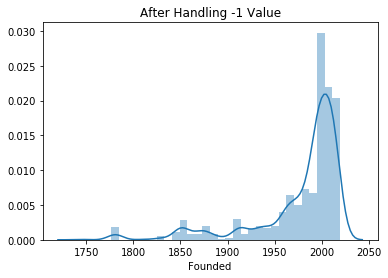

In [158]:
sns.distplot(df['Founded'])
plt.title('After Handling -1 Value')

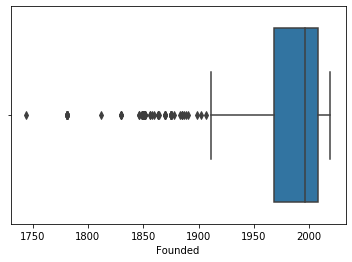

In [159]:
# Checking for the Outliers in Founded column
sns.boxplot(df['Founded'], data=df)

In [160]:
# Cleaning the Job Title column
df['Job Title'].value_counts(ascending=False).head(20)

Data Scientist                                 178
Data Engineer                                   68
Senior Data Scientist                           42
Data Analyst                                    18
Senior Data Engineer                            17
Business Intelligence Analyst                   13
Senior Data Analyst                             12
Lead Data Scientist                              8
Data Science Manager                             7
Machine Learning Engineer                        6
Sr. Data Engineer                                6
Marketing Data Analyst                           6
Principal Data Scientist                         6
Analytics Manager                                5
Lead Data Engineer                               5
Food Scientist - Developer                       4
Research Scientist                               4
Analytics Manager - Data Mart                    4
Sr. Data Engineer - Contract-to-Hire (Java)      4
Senior Research Scientist-Machi

In [161]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [162]:
df['job_title'] = df['Job Title'].apply(title_cleaner)

In [163]:
df['job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
mle                13
director           13
Name: job_title, dtype: int64

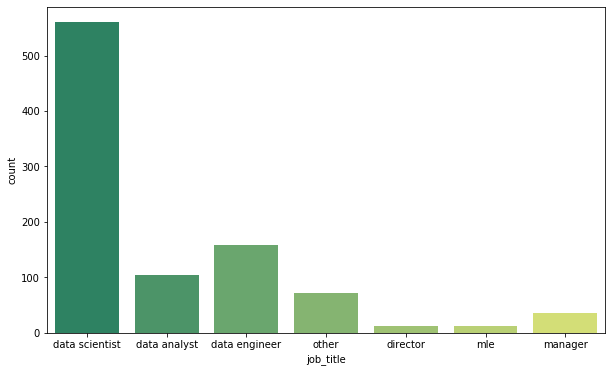

In [164]:
plt.figure(figsize=(10, 6))
sns.countplot(df['job_title'], data=df, palette='summer')

In [165]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist


In [166]:
df['job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
mle                13
director           13
Name: job_title, dtype: int64

In [167]:
def title_senority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'other'
    

In [168]:
df['job_seniority'] = df['Job Title'].apply(title_senority)

In [169]:
df['job_seniority'].value_counts()

other    687
sr       266
jr         3
Name: job_seniority, dtype: int64

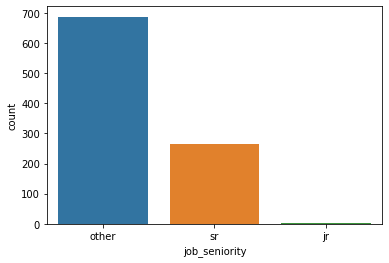

In [170]:
sns.countplot(df['job_seniority'], data=df)

In [171]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,other


In [172]:
df.drop('Job Title', axis=1, inplace=True)

In [173]:
salary = df['Salary Estimate'].apply(lambda x:x.split("(")[0])

In [174]:
salary.head()

0     $53K-$91K 
1    $63K-$112K 
2     $80K-$90K 
3     $56K-$97K 
4    $86K-$143K 
Name: Salary Estimate, dtype: object

In [175]:
salary = salary.apply(lambda x:np.NaN if x == '-1' else x)

In [176]:
# Removing the '$' and 'k' from the salary estimate column
salary = salary.apply(lambda x:x if type(x) == type(3.5) else x.replace('$', '').replace('K', ''))
salary

0                                       53-91 
1                                      63-112 
2                                       80-90 
3                                       56-97 
4                                      86-143 
5                                      71-119 
6                                       54-93 
7                                      86-142 
8                                       38-84 
9                                     120-160 
10                                    126-201 
11                                     64-106 
12                                    106-172 
13                                      46-85 
14                                     83-144 
15                                    102-190 
16                                     67-137 
17                                    118-189 
18                                    110-175 
19                                     64-111 
20                                     81-130 
21           

In [177]:
# Finding any inconsistencies in the salary
print(f"Length of salary: {len(salary.unique())}")
salary.unique()[380:]

Length of salary: 417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

**Note: Converting per hour salaries to per year salaries (assuming 45 work hours per week and 52 working weeks), and removing employer_provided_salary from the salary array**.

In [178]:
# Removing the string employer provided salary from salary array

salary = salary.apply(lambda x: x if type(x) == type(3.5) else x.lower().replace("employer provided salary:", ""))

In [179]:
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [180]:
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [181]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x: x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

In [182]:
# Handling the NAN value in salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

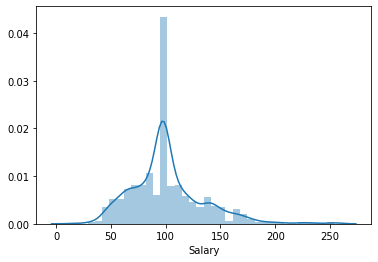

In [183]:
sns.distplot(df['Salary'])

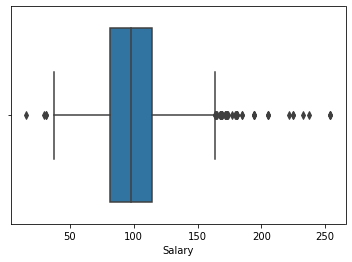

In [184]:
# Outliers in Salary columns
sns.boxplot(df['Salary'])

In [185]:
df['Company Name'].value_counts().head(15)

MassMutual\n3.6                                         14
Takeda Pharmaceuticals\n3.7                             14
Novartis\n3.8                                           14
Reynolds American\n3.1                                  14
Software Engineering Institute\n2.6                     13
The Church of Jesus Christ of Latter-day Saints\n4.2    13
Liberty Mutual Insurance\n3.3                           10
PNNL\n3.8                                               10
AstraZeneca\n3.9                                         9
Alector\n5.0                                             8
MITRE\n3.2                                               8
Rochester Regional Health\n3.3                           7
Pfizer\n4.0                                              7
Numeric, LLC\n3.2                                        7
Advanced BioScience Laboratories\n2.7                    7
Name: Company Name, dtype: int64

In [186]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])

In [187]:
df['Company Name'].value_counts().nlargest(15)

MassMutual                                         14
Reynolds American                                  14
Takeda Pharmaceuticals                             14
Novartis                                           14
Software Engineering Institute                     13
The Church of Jesus Christ of Latter-day Saints    13
Liberty Mutual Insurance                           10
PNNL                                               10
AstraZeneca                                         9
MITRE                                               8
Alector                                             8
Numeric, LLC                                        7
Pfizer                                              7
Fareportal                                          7
Advanced BioScience Laboratories                    7
Name: Company Name, dtype: int64

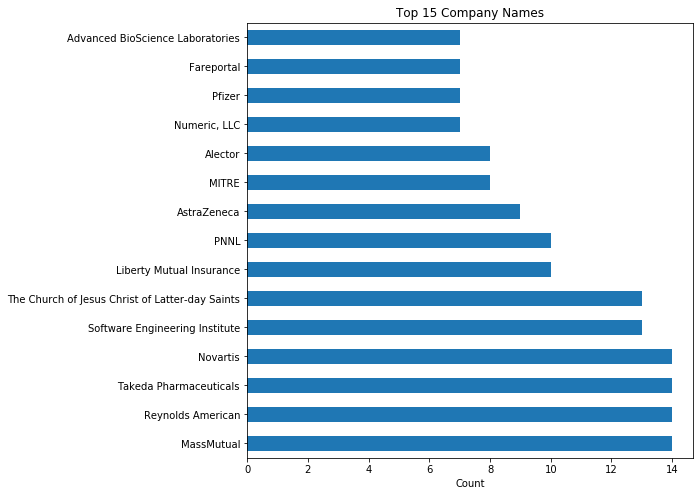

In [188]:
plt.figure(figsize=(8, 8))
g = df['Company Name'].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [189]:
df['Location'].value_counts().head(20)

New York, NY               78
San Francisco, CA          71
Cambridge, MA              59
Chicago, IL                37
Boston, MA                 24
Pittsburgh, PA             18
South San Francisco, CA    18
San Jose, CA               16
Austin, TX                 13
Chantilly, VA              13
Washington, DC             12
Rockville, MD              11
Herndon, VA                10
Winston-Salem, NC          10
Mountain View, CA          10
Riverton, UT               10
Richland, WA               10
Palo Alto, CA               9
Indianapolis, IN            9
San Diego, CA               9
Name: Location, dtype: int64

In [190]:
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print(f"Total Number of Locations are: {len(df['job_location'].unique())}")

Total Number of Locations are: 46


Text(0.5, 0, 'Count')

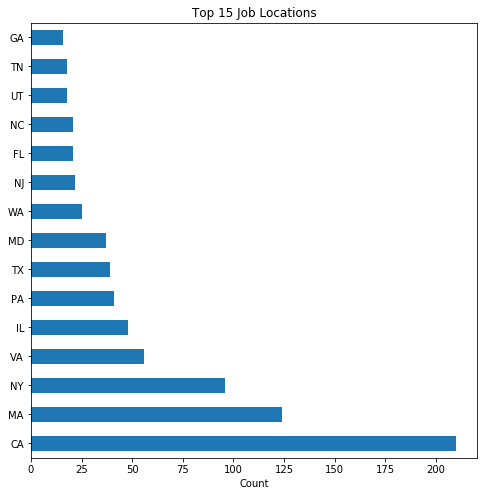

In [191]:
plt.figure(figsize=(8, 8))
df['job_location'].value_counts().nlargest(15).plot(kind='barh')
plt.title('Top 15 Job Locations')
plt.xlabel('Count')

In [192]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [193]:
# cleaning 'Size' column

def size_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown'
    else:
        return text

In [194]:
df['Size'] = df['Size'].apply(size_simplifier)

In [195]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     26
Name: Size, dtype: int64

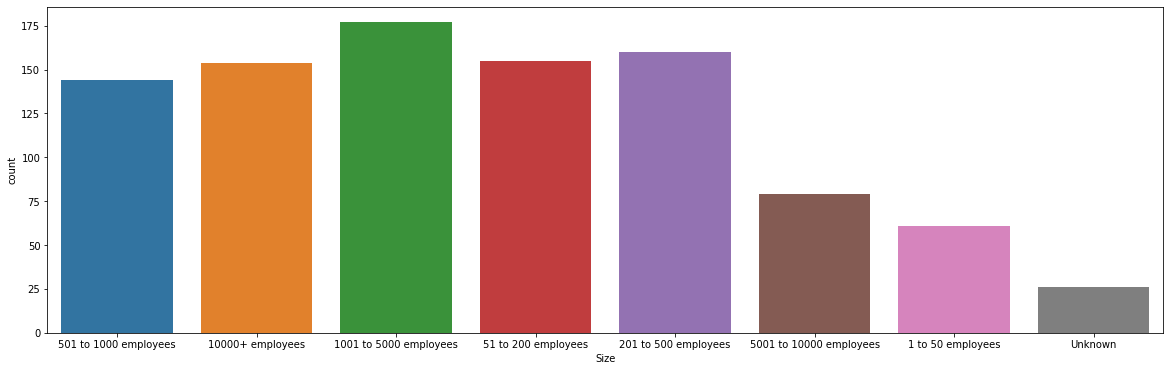

In [196]:
plt.figure(figsize=(20, 6))
sns.countplot(df['Size'], data=df)

In [197]:
df.head(1)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,72.0,NM


In [198]:
df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Contract                            5
Other Organization                  5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [199]:
def ownership_simplier(text):
    if 'private' in text.lower():
        return 'private'
    elif 'public' in text.lower():
        return 'public'
    elif ('-1' in text.lower()) or ('Unknown' in text.lower()) or ('School / School District' in text.lower()) or ('Private Practice / Firm' in text.lower()) or ('Contract' in text.lower()):
        return 'Other Organization'
    else:
        return text

In [200]:
df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplier)

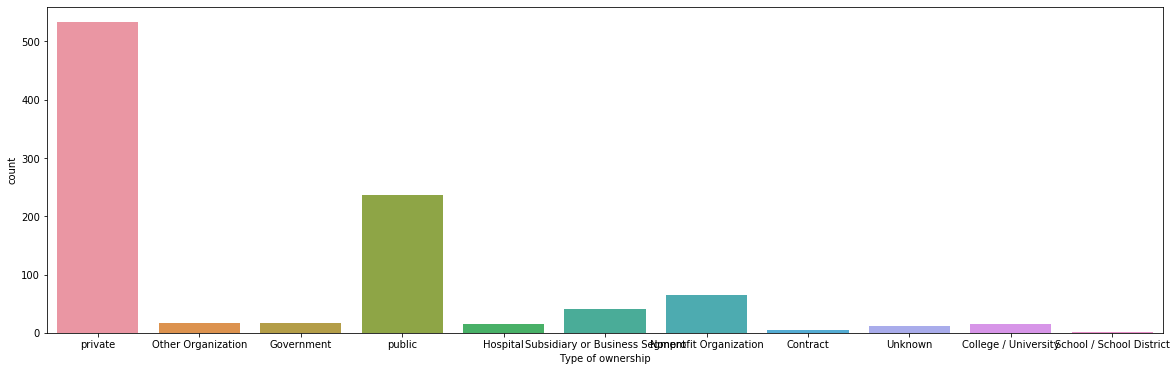

In [201]:
plt.figure(figsize=(20, 6))
sns.countplot(df['Type of ownership'], data=df)

In [202]:
df['Type of ownership'].value_counts()

private                           533
public                            237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Other Organization                 16
Hospital                           15
College / University               15
Unknown                            11
Contract                            5
School / School District            2
Name: Type of ownership, dtype: int64

In [203]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x == '-1' else x)

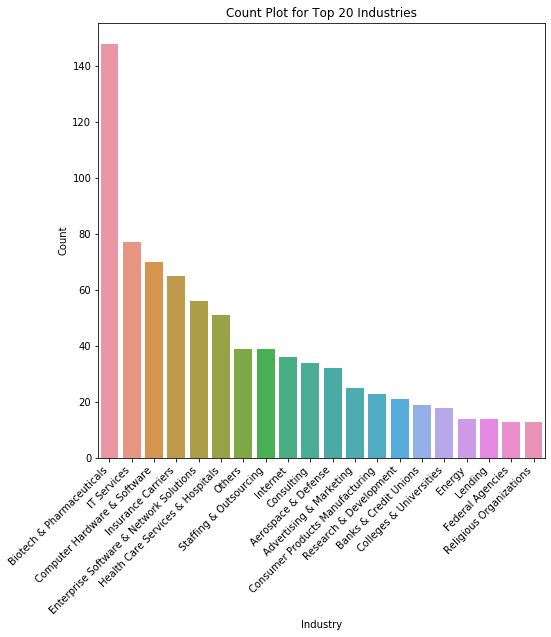

In [204]:
plt.figure(figsize=(8,8))
g = sns.countplot(x=df['Industry'], data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count Plot for Top 20 Industries')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [205]:
# Cleaning the 'Sector' column
df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Government                             13
Media                                  13
Transportation & Logistics              8
Travel & Tourism                        8
Real Estate                             8
Telecommunications                      6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Mining & Metals                         3
Agriculture & Forestry            

In [206]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x == '-1' else x)

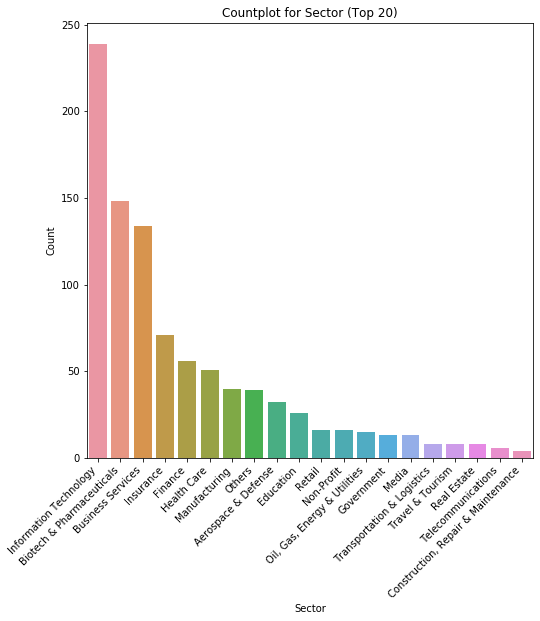

In [207]:
plt.figure(figsize=(8,8))
g = sns.countplot(x=df['Sector'], data =df, order= df['Sector'].value_counts()[:20].index)
p = plt.title('Countplot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment= 'right')

In [208]:
# Cleaning the 'Revenue' column
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [209]:
def revenue_simplier(text):
    if '-1' in text.lower():
        return 'Unknown / Non-Applicable'
    else:
        return text

In [210]:
df['Revenue'] = df['Revenue'].apply(revenue_simplier)

In [211]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            310
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

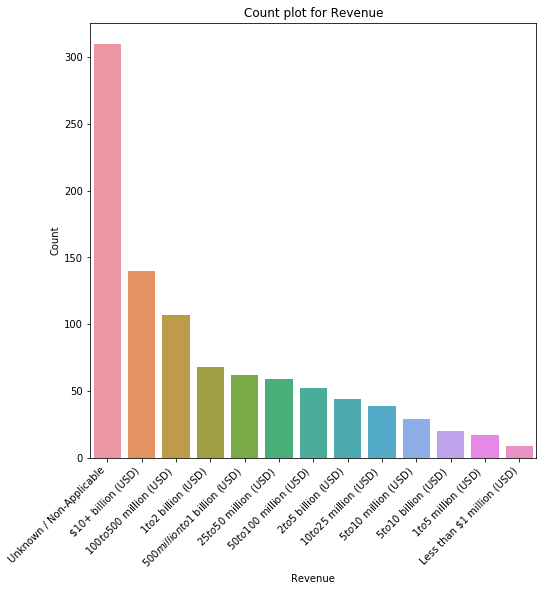

In [212]:
plt.figure(figsize=(8,8))
g = sns.countplot(x=df['Revenue'], data=df, order = df['Revenue'].value_counts()[0:20].index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


In [213]:
# Cleaning 'Competitors' column
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [214]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [215]:
df['Competitors'].value_counts()

0    634
3    253
2     50
1     18
4      1
Name: Competitors, dtype: int64

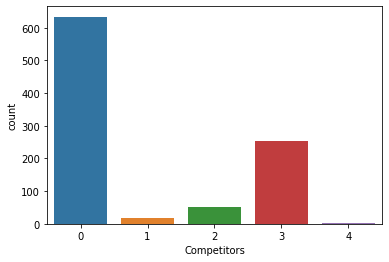

In [216]:
sns.countplot(df['Competitors'], data=df)

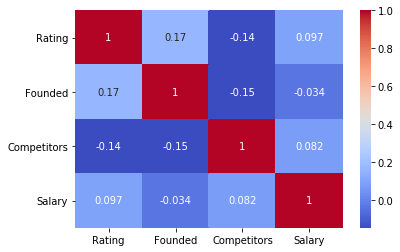

In [217]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### Feature Engineering

In [218]:
df.head(2)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD


#### Creating new feature from existing features

In [219]:
# Creating column of 'job_in_headquarters'

df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1) 

In [220]:
df['job_in_headquarters'].head(2)

0    0
1    0
Name: job_in_headquarters, dtype: int64

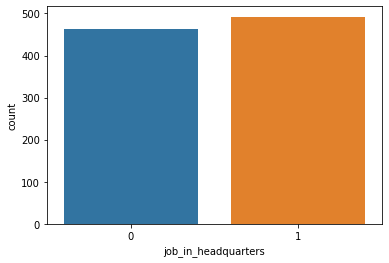

In [221]:
sns.countplot(df['job_in_headquarters'])

In [222]:
df.head(2)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location,job_in_headquarters
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM,0
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD,0


In [223]:
df.drop('Location', axis=1, inplace=True)

In [224]:
# Creating columns of 'Python', 'SQL', 'excel', 'tableau' jobs

df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [225]:
df.head(2)

,Salary Estimate,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,Competitors,job_title,job_seniority,Salary,job_location,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Goleta, CA",501 to 1000 employees,1973,private,Aerospace & Defense,Aerospace & Defense,...,0,data scientist,other,72.0,NM,0,1,1,0,1
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,...,0,data scientist,other,87.5,MD,0,1,0,0,0


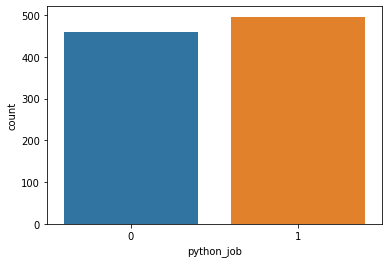

In [226]:
sns.countplot(df['python_job'], data=df)

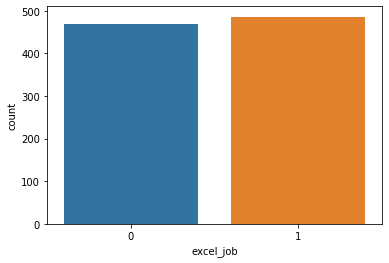

In [227]:
sns.countplot(df['excel_job'], data = df)

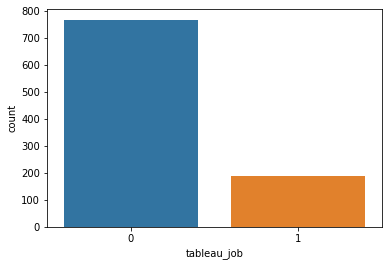

In [228]:
sns.countplot(df['tableau_job'], data=df)

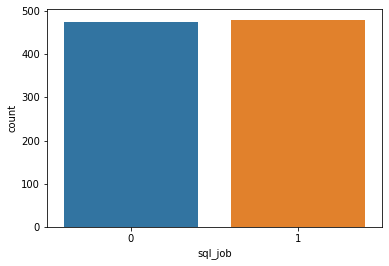

In [229]:
sns.countplot(df['sql_job'], data=df)

In [230]:
df.drop('Job Description', axis=1,inplace=True)

In [231]:
df.head(2)

,Salary Estimate,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research,"Goleta, CA",501 to 1000 employees,1973,private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM,0,1,1,0,1
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System,"Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD,0,1,0,0,0


## Trimimg the columns
- Features having more than 10 categories are trimmed to reduce the dimensionality.

In [232]:
# Triming the 'Sector' Column
# Taking top 9 sector and replacing remaining by the 'Others'

sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplier(text):
    if text not in sector_list:
        return 'Others'
    else:
        return text
    
df['Sector'] = df['Sector'].apply(sector_simplier)

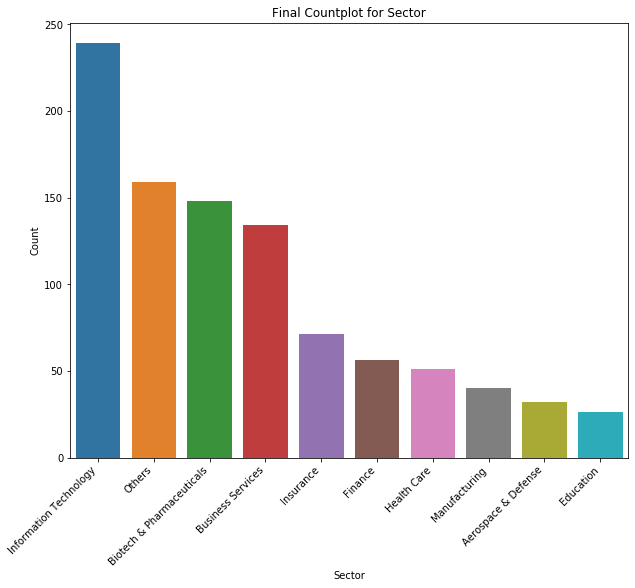

In [233]:
plt.figure(figsize=(10, 8))
g = sns.countplot(df['Sector'], data=df, order = df['Sector'].value_counts().index)
p = plt.title('Final Countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [234]:
# Triming the 'Job location' column

job_location_list = list(df['job_location'].value_counts()[:9].index)

In [235]:
job_location_list

['CA', 'MA', 'NY', 'VA', 'IL', 'PA', 'TX', 'MD', 'WA']

In [236]:
def job_location_simplifier(text):
    if text not in job_location_list:
        return 'Others'
    else:
        return text

In [237]:
df['job_location'] = df['job_location'].apply(job_location_simplifier)

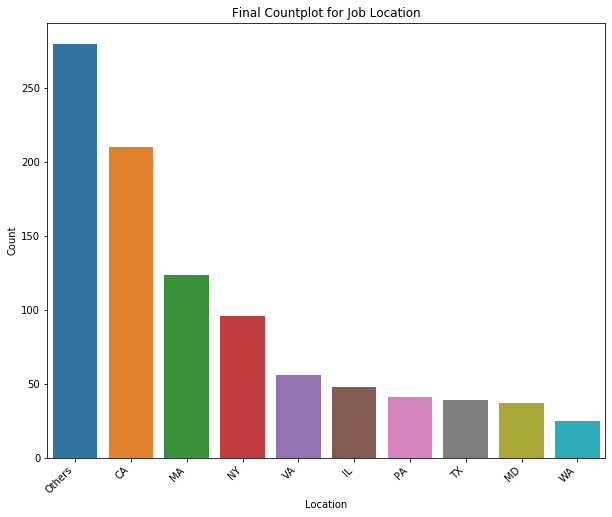

In [238]:
plt.figure(figsize=(10, 8))
g = sns.countplot(df['job_location'], data=df, order = df['job_location'].value_counts().index)
p = plt.title('Final Countplot for Job Location')
p = plt.xlabel('Location')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [239]:
df.head(2)

,Salary Estimate,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research,"Goleta, CA",501 to 1000 employees,1973,private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,Others,0,1,1,0,1
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System,"Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD,0,1,0,0,0


In [240]:
df.drop(['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [241]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [242]:
df.head(2)

,Rating,Size,Founded,Type of ownership,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.8,501 to 1000 employees,1973,private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,0,1,1,0,1
1,3.4,10000+ employees,1984,Other Organization,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,0,1,0,0,0


In [243]:
# Renaming columns
df.rename(columns={'Rating': 'company_rating', 'Size': 'company_size', 'Founded': 
                  'company_founded','Type of ownership': 'type_of_ownership', 'Sector': 'sector', 'Revenue': 'revenue', 'Competitors': 'competitors', 'Salary': 'salary'}, inplace=True)

In [244]:
df.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,job_title,job_seniority,salary,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.8,501 to 1000 employees,1973,private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,0,1,1,0,1
1,3.4,10000+ employees,1984,Other Organization,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,0,1,0,0,0
2,4.8,501 to 1000 employees,2010,private,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,1,1,1,1,0
3,3.8,1001 to 5000 employees,1965,Government,Others,$500 million to $1 billion (USD),3,data scientist,other,76.5,1,1,0,0,0
4,2.9,51 to 200 employees,1998,private,Business Services,Unknown / Non-Applicable,3,data scientist,other,114.5,1,1,1,1,0


### Handling the ordinal features
Ordinal features are **categorical variables that have some ranking associated with them** (eg. size, rating, mark) etc.

In [245]:
df['company_size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     26
Name: company_size, dtype: int64

In [246]:
# Mapping ranks to 'company size' columns
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3, '501 to 1000 employees': 4,'1001 to 5000 employees': 5,'5001 to 10000 employees': 6, '10000+ employees': 7 }

In [247]:
size_map

{'Unknown': 0,
 '1 to 50 employees': 1,
 '51 to 200 employees': 2,
 '201 to 500 employees': 3,
 '501 to 1000 employees': 4,
 '1001 to 5000 employees': 5,
 '5001 to 10000 employees': 6,
 '10000+ employees': 7}

In [248]:
df['company_size'] = df['company_size'].map(size_map)

In [249]:
df['company_size'].value_counts()

5    177
3    160
2    155
7    154
4    144
6     79
1     61
0     26
Name: company_size, dtype: int64

In [250]:
df['revenue'].value_counts()

Unknown / Non-Applicable            310
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
Less than $1 million (USD)            9
Name: revenue, dtype: int64

In [251]:
# Mapping the 'revenue' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

In [252]:
revenue_map

{'Unknown / Non-Applicable': 0,
 'Less than $1 million (USD)': 1,
 '$1 to $5 million (USD)': 2,
 '$5 to $10 million (USD)': 3,
 '$10 to $25 million (USD)': 4,
 '$25 to $50 million (USD)': 5,
 '$50 to $100 million (USD)': 6,
 '$100 to $500 million (USD)': 7,
 '$500 million to $1 billion (USD)': 8,
 '$1 to $2 billion (USD)': 9,
 '$2 to $5 billion (USD)': 10,
 '$5 to $10 billion (USD)': 11,
 '$10+ billion (USD)': 12}

In [253]:
df['revenue'] = df['revenue'].map(revenue_map)

In [254]:
df['revenue'].head()

0     6
1    10
2     7
3     8
4     0
Name: revenue, dtype: int64

In [255]:
# Mapping ranks to 'job_seniority' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

In [256]:
df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

### Handling the nominal categorical features
Nominal Features are **categorical variables that have no numerical importance** (eg. occupation, name, etc.)

In [257]:
df.head(2)

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,job_title,job_seniority,salary,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.8,4,1973,private,Aerospace & Defense,6,0,data scientist,0,72.0,0,1,1,0,1
1,3.4,7,1984,Other Organization,Health Care,10,0,data scientist,0,87.5,0,1,0,0,0


In [258]:
df = pd.get_dummies(columns=['type_of_ownership'], data=df,prefix='ownership')

In [259]:
df.head(2)

,company_rating,company_size,company_founded,sector,revenue,competitors,job_title,job_seniority,salary,job_in_headquarters,...,ownership_Contract,ownership_Government,ownership_Hospital,ownership_Nonprofit Organization,ownership_Other Organization,ownership_School / School District,ownership_Subsidiary or Business Segment,ownership_Unknown,ownership_private,ownership_public
0,3.8,4,1973,Aerospace & Defense,6,0,data scientist,0,72.0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.4,7,1984,Health Care,10,0,data scientist,0,87.5,0,...,0,0,0,0,1,0,0,0,0,0


In [260]:
## Removing 'Sector' columns using get_dummies
df = pd.get_dummies(columns=['sector'], data=df, prefix='sector')

In [261]:
df.head(2)

,company_rating,company_size,company_founded,revenue,competitors,job_title,job_seniority,salary,job_in_headquarters,python_job,...,sector_Aerospace & Defense,sector_Biotech & Pharmaceuticals,sector_Business Services,sector_Education,sector_Finance,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,sector_Others
0,3.8,4,1973,6,0,data scientist,0,72.0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,3.4,7,1984,10,0,data scientist,0,87.5,0,1,...,0,0,0,0,0,1,0,0,0,0


In [262]:
## Removing the 'job_title' using the get_dummies()

df = pd.get_dummies(columns=['job_title'], data=df)

In [263]:
df.head(2)

,company_rating,company_size,company_founded,revenue,competitors,job_seniority,salary,job_in_headquarters,python_job,excel_job,...,sector_Insurance,sector_Manufacturing,sector_Others,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle,job_title_other
0,3.8,4,1973,6,0,0,72.0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,3.4,7,1984,10,0,0,87.5,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [264]:
# Removing the 'Other' columns to reduce the dimensionality reduction and avoid dummy trap
df.drop(['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

In [265]:
df.head(2)

,company_rating,company_size,company_founded,revenue,competitors,job_seniority,salary,job_in_headquarters,python_job,excel_job,...,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle
0,3.8,4,1973,6,0,0,72.0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3.4,7,1984,10,0,0,87.5,0,1,0,...,1,0,0,0,0,0,1,0,0,0


### Feature Selection
Selecting Features based on the Information gain and correlation_matrix

In [266]:
X = df.drop('salary', axis=1)

In [267]:
X.shape

(956, 36)

In [268]:
y = df['salary']

In [269]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [270]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000025343F00D08>)

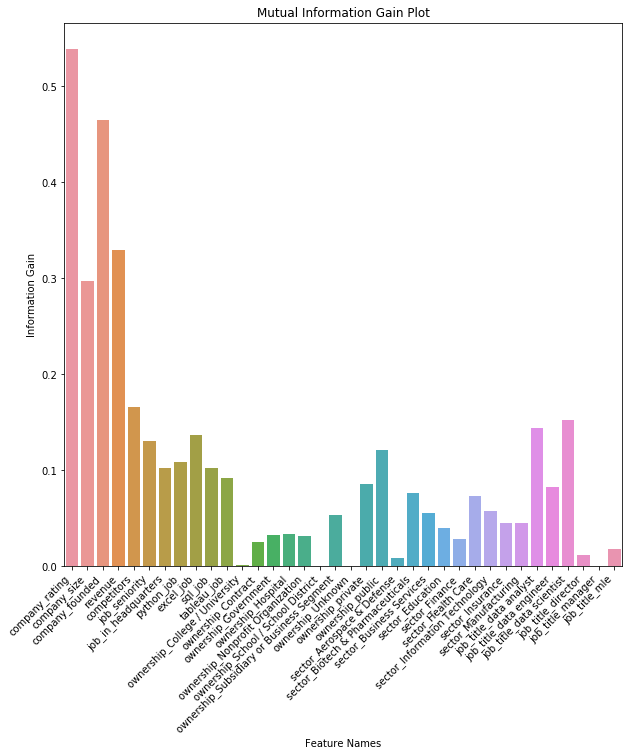

In [271]:
plt.figure(figsize=(10, 10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain Plot')
p = plt.xlabel('Feature Names')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment = 'right')

**Insight**: From feature importance chart, it is evident that there are atleast **20 features that impact the target variable**.

In [272]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)

In [273]:
top_20_features = feature_imp.nlargest(n=20, columns=['Score'])

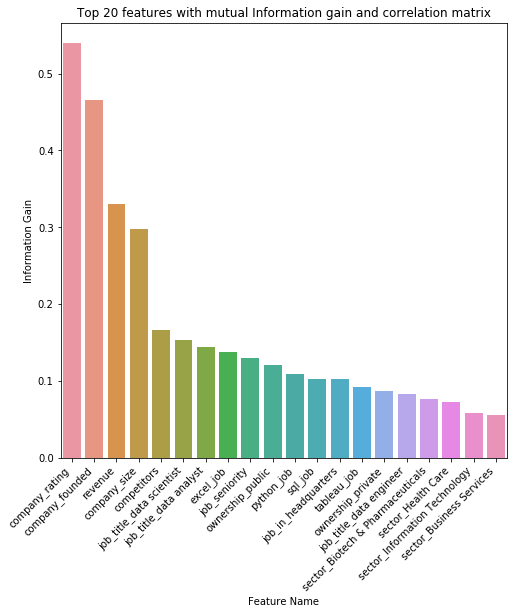

In [274]:
plt.figure(figsize=(8,8))
g = sns.barplot(x=top_20_features.index, y=top_20_features['Score'])
p = plt.title('Top 20 features with mutual Information gain and correlation matrix')
p = plt.xlabel('Feature Name')
p = plt.ylabel('Information Gain')
g = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment='right')

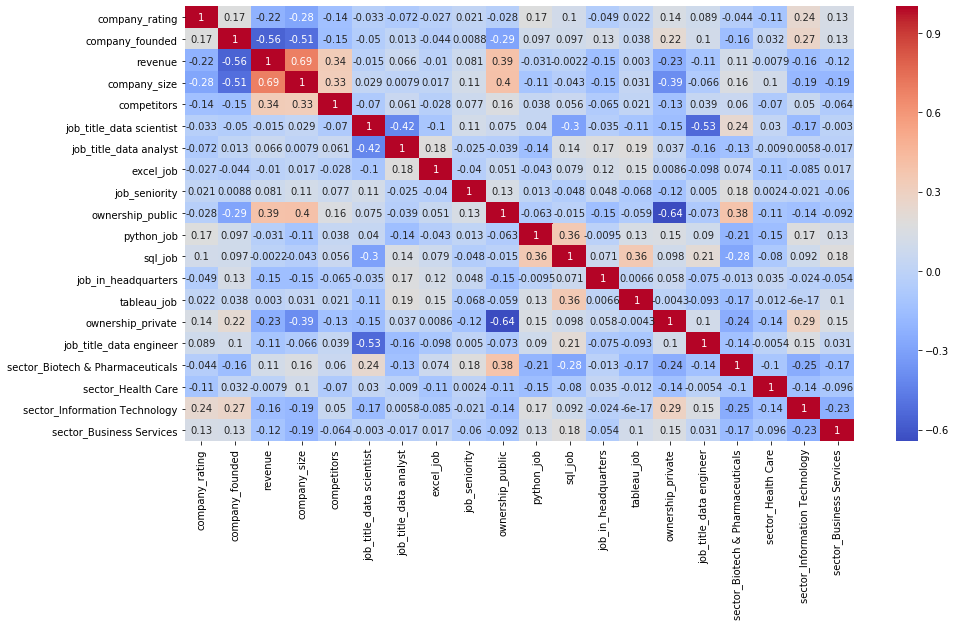

In [275]:
### Finding and plotting the co-relation between the top 20 features

plt.figure(figsize=(15, 8))
sns.heatmap(X[top_20_features.index].corr(), annot=True, cmap='coolwarm')

Range of correlation are as follows:

-- **Strong correlation: X > 0.7
-- Moderate correlation: 0.5 < X < 0.7
-- Weak correlation: X < 0.5**

Insight: From the correlation matrix, it is evident that features **(ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue)**
are moderately correlated. Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features.

In [276]:
X = X[top_20_features.index]
X.drop(labels=['company_size', 'revenue'], axis=1, inplace=True)

In [277]:
X.head(2)

,company_rating,company_founded,competitors,job_title_data scientist,job_title_data analyst,excel_job,job_seniority,ownership_public,python_job,sql_job,job_in_headquarters,tableau_job,ownership_private,job_title_data engineer,sector_Biotech & Pharmaceuticals,sector_Health Care,sector_Information Technology,sector_Business Services
0,3.8,1973,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0
1,3.4,1984,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [278]:
X.columns

Index(['company_rating', 'company_founded', 'competitors',
       'job_title_data scientist', 'job_title_data analyst', 'excel_job',
       'job_seniority', 'ownership_public', 'python_job', 'sql_job',
       'job_in_headquarters', 'tableau_job', 'ownership_private',
       'job_title_data engineer', 'sector_Biotech & Pharmaceuticals',
       'sector_Health Care', 'sector_Information Technology',
       'sector_Business Services'],
      dtype='object')

In [279]:
X.drop('ownership_public', axis=1, inplace=True)

In [280]:
X.head(2)

,company_rating,company_founded,competitors,job_title_data scientist,job_title_data analyst,excel_job,job_seniority,python_job,sql_job,job_in_headquarters,tableau_job,ownership_private,job_title_data engineer,sector_Biotech & Pharmaceuticals,sector_Health Care,sector_Information Technology,sector_Business Services
0,3.8,1973,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0
1,3.4,1984,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [281]:
X.columns

Index(['company_rating', 'company_founded', 'competitors',
       'job_title_data scientist', 'job_title_data analyst', 'excel_job',
       'job_seniority', 'python_job', 'sql_job', 'job_in_headquarters',
       'tableau_job', 'ownership_private', 'job_title_data engineer',
       'sector_Biotech & Pharmaceuticals', 'sector_Health Care',
       'sector_Information Technology', 'sector_Business Services'],
      dtype='object')

In [282]:
# Rearranging the columns

X = X[['company_rating', 'company_founded', 'competitors',
       'sector_Health Care', 'sector_Business Services',
       'ownership_private', 'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

In [283]:
X.head(2)

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,ownership_private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,3.8,1973,0,0,0,1,0,1,0,0,0,1,1,1,0
1,3.4,1984,0,1,0,0,0,1,0,0,0,0,1,0,0


## Feature Scaling

In [284]:
from sklearn.preprocessing import StandardScaler

X_prev = X.copy()
sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

In [285]:
X.head(2)

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,ownership_private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,0.048588,-0.086728,0,0,0,1,0,1,0,0,0,1,1,1,0
1,-0.620043,0.138799,0,1,0,0,0,1,0,0,0,0,1,0,0


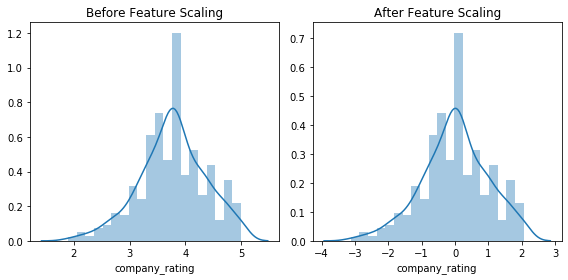

In [286]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

## Model Building and Evaluation

In [287]:
from sklearn.model_selection import cross_val_score

In [288]:
# Fitting the multiple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f"-----Average NRMSE: {cv.mean():.5}----")
print(f"-----Standard Deviation: {cv.std():.4}")

-----Average NRMSE: -27.811----
-----Standard Deviation: 2.101


In [289]:
## Fitting the model on Lasso Regression on training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y,cv=10, scoring='neg_root_mean_squared_error')
print(f"-----Average NRMSE: {cv.mean():.5}----")
print(f"-----Standard Deviation: {cv.std():.4}")

-----Average NRMSE: -28.245----
-----Standard Deviation: 1.691


In [290]:
## Fitting the model on Random Forest to the training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f"-----Average NRMSE: {cv.mean():.5}----")
print(f"-----Standard Deviation: {cv.std():.4}")

-----Average NRMSE: -17.924----
-----Standard Deviation: 5.231


In [291]:
## Fitting the model on 'Gradient Boosting' on training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f"-----Average NRMSE: {cv.mean():.5}----")
print(f"-----Standard Deviation: {cv.std():.4}")

-----Average NRMSE: -25.071----
-----Standard Deviation: 2.319


**Note: Random Forest & Gradient Boosting algorithms are selected amongst all the other algorithms**
    because they have the highest value for Negative Root Mean Squared Error (NRMSE) i.e. lowest value for Root Mean Squared Error (RMSE) metric. And fed to Voting algorithm to reduce the error!

In [292]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f"-----Average NRMSE: {cv.mean():.5}----")
print(f"-----Standard Deviation: {cv.std():.4}")

-----Average NRMSE: -19.44----
-----Standard Deviation: 4.177


**Note**: Voting algorithm too did not perform well as compared to Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement**.

### Making Predictions

In [294]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [295]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
  prediction_input.append(competitors)
  

  sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [296]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 82760(USD) to 100760(USD) per annum.


In [298]:
# Prediction 2
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Biotech & Pharmaceuticals', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 115911(USD) to 133911(USD) per annum.
